# Livrable Final

## Table des matières
- Introduction
1. Contraintes
2. Modélisation
3. Implémentation
4. Exploitation
- Conclusion

 ## Introduction

L’ADEME (Agence de l’Environnement et de la Maîtrise de l’Energie) a récemment lancé un appel à manifestation d’intérêt pour promouvoir la réalisation de démonstrations et d’expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptées à différents types de territoires.   Notre équipe fait partie de la structure CesiCDP déjà implantée dans le domaine et nous avons été mobilisé pour répondre à cet appel. CesiCDP souhaite que l’on oriente l’étude sur la gestion de tournées de livraison. Le problème algorithmique consiste a calculer, sur un réseau routier quelconque, une tournée permettant de relier entre elles un sous-ensemble de villes avec pour but de revenir au point de départ en un minimum de temps. Une méthode algorithme permettrant de répondre a ce problème est attendu. Il est aussi demandé d’ajouter des contraintes supplémentaires afin de rendre le model plus réaliste possible.


## 1.Contraintes

Afin de répondre à l’appel d’offre de l’ADEME, nous avons donc dû identifier les contraintes que nous voulions traiter de notre algorithme.
Notre solution doit :

- Réaliser un cycle permettant de passer par toutes les villes souhaitées,
- Prendre en compte le temps nécessaire pour le trajet entre deux villes.

De plus, nous avons opté pour ajouter une contrainte supplémentaire :

Le temps de parcours d’une arête varie au cours du temps. Cette contrainte nous a paru pertinente car le temps nécessaire au transit n’est généralement pas le même en fonction de la densité de circulation qui varie en fonction du temps.

## 2.Modélisation
Le problème que l'on nous demande de traiter dans ce projet repose sur un problème plus largement étudier qui est celui du voyageur de commerce. Ce problème est un sujet bien connu en algorithmique du fait de sa complexité initial et du nombre de sous problèmes qu'il soulève. Pour le résoudre nous avons choisis de suivre les études faites sur le sujet et donc d'utiliser des algorithme Heuristiques et Métaheuristiques.

Nous avons donc selectionné 3 algorithmes pour nous aider à resoudre notre problèmatique général. Chacun d’eux a ses avantages et ses inconvénients.
Il faudra donc retenir qu'on ne retiendra pas la même solution dans la mesure où l’on va privilégié le temps de calcul, la qualité de la solution, ou encore le choix des solutions.

On peut commencer par citer le premier algorithme que nous allons utiliser qui fait partie de la famille des algorithmes gloutons. Il s'agit d'une famille d'algorithme qui font le choix de l'optimum local pour chaque étape d'un problème. Celui que nous avons retenu est l’algorithme du plus proche voisin. Il nous permettra de récupérer une solution valide, mais pas optimale.

L'algorithme du plus proche voisin se base, comme son nom l'indique, sur la sélection de la ville la plus proche de la position actuelle. Le principe est que la prochaine ville est sélectionnée tel que le poids de l'arrête entre la ville actuelle et la prochaine ville soit le plus petit possible (temps minimal). L'opération sera répété jusqu'à avoir visité toutes les villes et être revenu à la ville de départ du cycle.

Nous porterons donc notre choix sur la mise en place d'une combinaison d'algorithmes pour résoudre notre problème.

Puis, nous utiliserons un algorithme métaheuristique, qui prendra en entrée la solution précédemment trouvée, et qui essayera de l'améliorer. Pour celui-ci, nous avons choisi l'algorithme métaheuristique du recuit simulé.

Pendant nos recherches sur le sujet, nous sommes tombés sur une thèse qui introduit differents algorithmes permettant la résolution du voyageur de commerce.
On y retrouve l'algorithme fourmis, l'algorithme génétique et l'algorithme du recuit simulé.
Bien que les deux premiers soient intéréssant sur le principe, nous nous sommes concentrés sur le dernier.
Un tableau est en annexe et affiche le temps de résolution du problème par chaque algorithme. La conclusion fut que l'algorithme de recuit simulé été le meilleur des trois ce qui a porté notre attention sur ce dernier.


Nous avons donc approfondi nos recherches sur l'algorithme du recuit simulé d'après la thèse en annexe et ce que nous avons vue durant nos prosits. L'algorithme du recuit simulé nous a semblé facile au premier regarde mais nous avons vite remarqué que la configuration de cet algorithme serait un peu plus long que prévu du fait de ses nombreux paramêtres.

Des études théoriques du recuit simulé ont pu montrer que sous certaines conditions, l'algorithme du recuit convergeait vers un optimum global. Cela veut donc dire que contrairement à d'autres algorithmes métaheuristiques, le recuit simulé peut trouver un état correspondant à la meilleure solution, si on le laisse chercher indéfiniment.


Enfin pour prouver que la solution est vérifiable en temps polynomiale nous allons mettre en place un algorithme de certificat :

   Mais avant cela qu'est-ce qu'un temps polynomiale ?

Un temps polynomial peut être vu comme le temps minimum d’exécution d’un algorithme en fonction des données en
entrée. Un algorithme est résolu en temps polynomial si, pour toutes constantes c et n indépendantes, avec n un entier
présentant la taille des données en entrée, il s’exécute en moins de c.n<sup>k</sup> opérations élémentaires (et k est une constante indépendante des deux autres).

Par la suite, dans notre situation de voyageur de commerce et dans les contraintes demandées, notre solution doit être vérifiable dans un temps polynomiale sur un jeu de données de plusieurs milliers de points. Nous allons donc apporter la preuve :

## Section de daniel sur les algos de certificat et la reolution en temps polynomiale

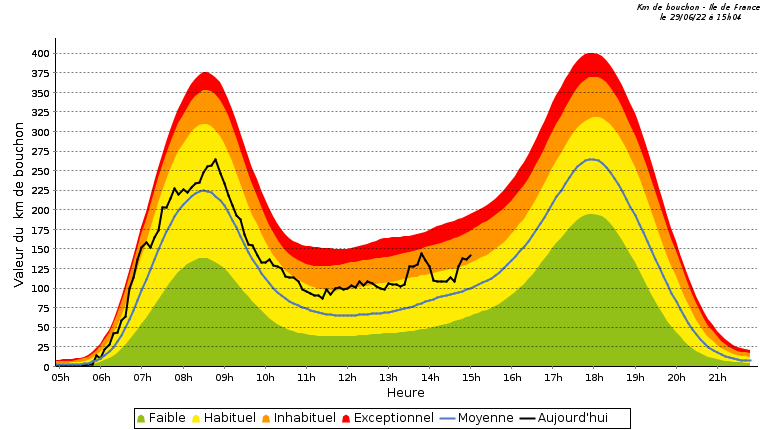

In [3]:
import requests
import bs4
from IPython import display

raw_html = requests.get("http://www.sytadin.fr/sys/barometre_courbe_cumul.jsp.html")
soup = bs4.BeautifulSoup(raw_html.text, features="html.parser")

elem = soup.find(name="img", attrs={"alt":"Courbe du cumul de bouchon"})
img_path = elem.get("src")
img_data = requests.get(f"http://www.sytadin.fr{img_path}").content

display.display(display.Image(img_data))

## 3.Implémentation

#### Notre générateur :




In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import *
import time

In [4]:
def GeneratorCity(nb_city: int = 10, size_map: tuple = (100, 100)) -> list:
    """
    Return a list of cities with random coordinates and their utility

    Arguments:
        nb_city: Number of cities
        size_map: Area of the map in this format : (max_abscissa, max_ordinate)
        display: Draw a diagram of the situation

    Return:
        An array of cities with the abscissa, ordinate and the use of each cities ;
        0 means "This city is not important" ;
        1 means "This city must be delivered" ;
        2 means "This city is the depository" ;
    """

    # Randomization of points
    abscissa = random.sample(range(0, size_map[0]), nb_city)
    ordinate = random.sample(range(0, size_map[1]), nb_city)

    # Return the list of coordinate
    return [[abscissa[i],ordinate[i]] for i in range(nb_city)]


def DefinitionCity(cities: list, no_delivered: bool = True) -> list:
    """
    Defines the type of cities

    Arguments:
        cities: The cities
        no_delivered: Removal of undelivered cities

    Return:
        The list of cities
    """

    # Define the kind of city
    delivered = random.choices(population=[0, 1], k=len(cities))

    # Define a repository
    delivered[random.randint(1, len(cities)) - 1] = 2

    # Return the list of city
    return [[cities[i][0],cities[i][1],delivered[i]] for i in range(len(cities)) if delivered[i] != 0 and no_delivered]


def GeneratorGraph(cities: list, fluctuation: int = 10, fluctuation_weight: int = 10):
    """
    Return the graph of the instance

    Arguments:
        cities: The coordinate from the city in this format : [max_abscissa, max_ordinate]
        fluctuation: The rate of fluctuation of the cost of the arcs
        fluctuation_weight: The fluctuation amplitude of the cost of the arcs

    Return:
        A matrix of size [nb_city, nb_city, 3]
    """

    # Initialization of the graph matrix
    generator = np.array([[(0, 0, 0)] * len(cities)] * len(cities))

    # For each element of the graph
    for i in range(len(cities)):
        for j in range(len(cities)):
            if i != j:
                # Traffic randomization
                arc_fluctuation = random.randrange(1, fluctuation)
                # Calculation of the distance between two points
                arc_min_cost = sqrt(pow(cities[i][0] - cities[j][0], 2) + pow(cities[i][1] - cities[j][1], 2))
                # Randomization of the traffic amplitude
                arc_fluctuation_weight = random.randrange(1, fluctuation_weight) * arc_min_cost

                # Completion of the matrix
                generator[i][j] = (arc_fluctuation, arc_fluctuation_weight, arc_min_cost)

    # Return the matrix
    return generator

Création de notre instance



#### K-Nearest Neightbors Algorithm :

L'algorithme naïf de recherche de voisinage consiste à passer sur l'ensemble des n points de A et à regarder si ce point est plus proche ou non qu'un des plus proches voisins déjà sélectionné, et si oui, l'insérer. On obtient alors un temps de calcul linéaire en la taille de A : O(n) (tant que k << n). Cette méthode est appelée la recherche séquentielle ou recherche linéaire.

Le probleme est que la recherche linéaire souffre d'un problème de lenteur. Si l'ensemble A est grand, il est alors extrêmement coûteux de tester les n points de l'espace.

##### Démonstration :

In [5]:
def EnergieSum(graph: np.array([[()]]), cycle: tuple) -> float:
    """
    Calculation of the energies of the graph

    Arguments:
        graph: The graph

    Return:
        The energie of the graph

    """
    # Energy initialization
    energie = 0

    # For each point of the graph
    for i in range(len(cycle) - 1):
        # Add the energy of the path
        energie += CalculArc(graph, energie, (cycle[i], cycle[i+1]))

    return energie


def NearestNeightbor(graph: np.array([[()]]), time: float, start_city: int, cities_available: list):
    """
    Get the nearest neightbor city which isn't use

    Arguments:
        graph: The graph
        time: The start time
        start_city: The start city
        cities_available: The list of cities which are available

    Return:
        The nearest neightbor city and the add time needed
    """

    nearest_neightbor = cities_available[0]
    lowest_time = CalculArc(graph, time, (start_city, cities_available[0]))

    for cities in cities_available[1:]:
        current_time = CalculArc(graph, time, (start_city, cities))
        if current_time < lowest_time:
            lowest_time = current_time
            nearest_neightbor = cities

    if len(cities_available) > 1:
        return [nearest_neightbor] + NearestNeightbor(graph, time + lowest_time, nearest_neightbor, [city for city in cities_available if city != nearest_neightbor])
    else:
        return [nearest_neightbor]


Calcul de K-Nearest Neightbor avec notre instance.

#### Recuit simulé :

" NEED DEFINITION DU RECUIT SIMULE "

##### Démonstration :



In [6]:
def ModificationElementaire(points, nbPoints):
    rand1 = np.random.randint(0, nbPoints)
    cond = True
    while(cond):
        rand2 = np.random.randint(0, nbPoints)
        cond = rand1 == rand2
    if rand1>rand2 :
        rand1, rand2 = rand2, rand1
    #print(rand1)
    #print(rand2)
    return points[:rand1]+points[rand2:rand2+1]+points[rand1+1:rand2]+points[rand1:rand1+1]+points[rand2+1:]

def Recuit(points, nbPoints, energie, temperature, tempmin = 0.01, multipli = 0.99):
    while(temperature>tempmin):
        newP = ModificationElementaire(points, nbPoints)
        newE = EnergieSum(newP, nbPoints)
        if newE<energie or np.random.random() < math.exp(-(newE-energie)/temperature):
            energie = newE
            points = newP
        temperature = temperature*multipli
    return points, energie


Calcul de l'instance avec le recuit simulé avec un path aléatoire

Calcul de l'instance avec le chemin du K-Nearest Neighbor

#### Hill Climbing :

" NEED DEFINITION HILL CLIMBING "

##### Démonstration :

## 4.Exploitation

## Conclusion